# Week 6 - Mapping
This week we are going to cover basic mapping in R and high resolution mapping using GADM in R. Here I have linked the GADM website in the case that anyone needs it.

https://gadm.org/

### Contents
1. [Basic world map](#1)
2. [Basic US maps](#2)
4. [High resolution mapping with GADM](#3)
5. [Plotting rivers and terrain](#4)

In [1]:
library(ggplot2)
library(raster)
library(sf)
library(geodata)
library(mapproj)
library(tidyterra)
library(viridis)

Loading required package: sp

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Loading required package: terra

terra 1.7.71

Loading required package: maps


Attaching package: ‘tidyterra’


The following object is masked from ‘package:raster’:

    select


The following object is masked from ‘package:stats’:

    filter


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:maps’:

    unemp




In [2]:
theme_set(theme_bw())

<a name = "1"></a>
### Basic world map
This uses ggplot to plot a basic low resolution world map. Just like with other plots we've made in ggplot, the appearance can be customized using `aes()` and `theme()` adjustments. Because we have gone over that in previous classes, I'm going to stick to basics for the graphs below.

First we need to load the world map data which is done using `map_data()` below.

In [3]:
world_data <- map_data("world")
head(world_data)

long      lat      group order region subregion
1 -69.89912 12.45200 1     1     Aruba  NA       
2 -69.89571 12.42300 1     2     Aruba  NA       
3 -69.94219 12.43853 1     3     Aruba  NA       
4 -70.00415 12.50049 1     4     Aruba  NA       
5 -70.06612 12.54697 1     5     Aruba  NA       
6 -70.05088 12.59707 1     6     Aruba  NA

Next we plot the world map using `geom_map()` in ggplot. 

Warning message in geom_map(data = world_data, map = world_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


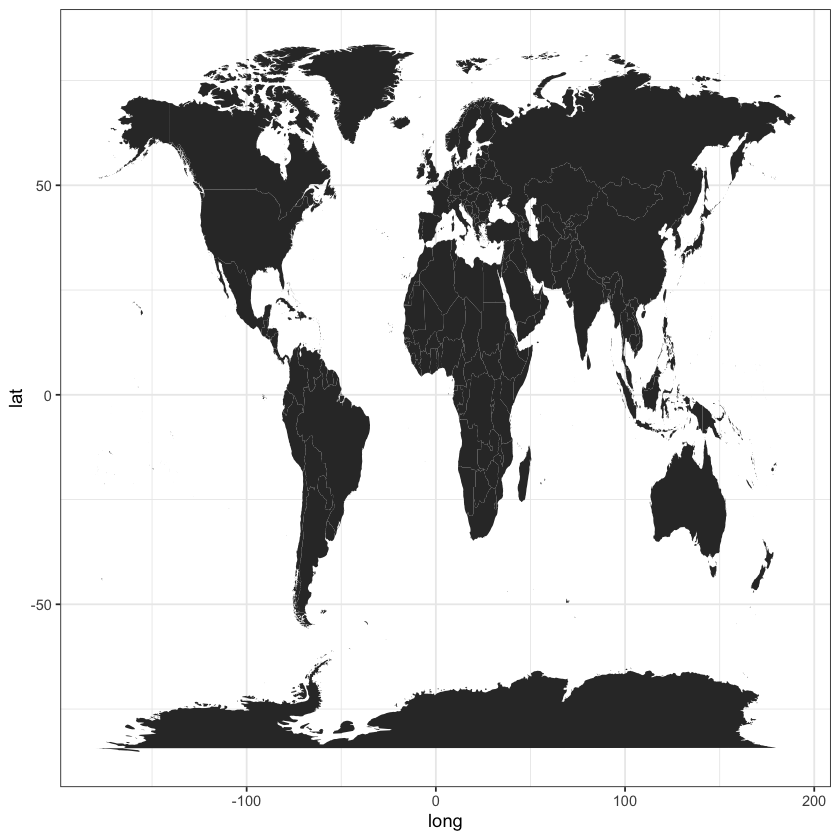

In [4]:
ggplot() + geom_map(data = world_data, map = world_data, aes(long, lat, map_id = region))

Since region designates individual countries, if you wanted to color countries differently you can set that in `aes()` inside `geom_map()` using the fill variable.

Warning message in geom_map(data = world_data, map = world_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


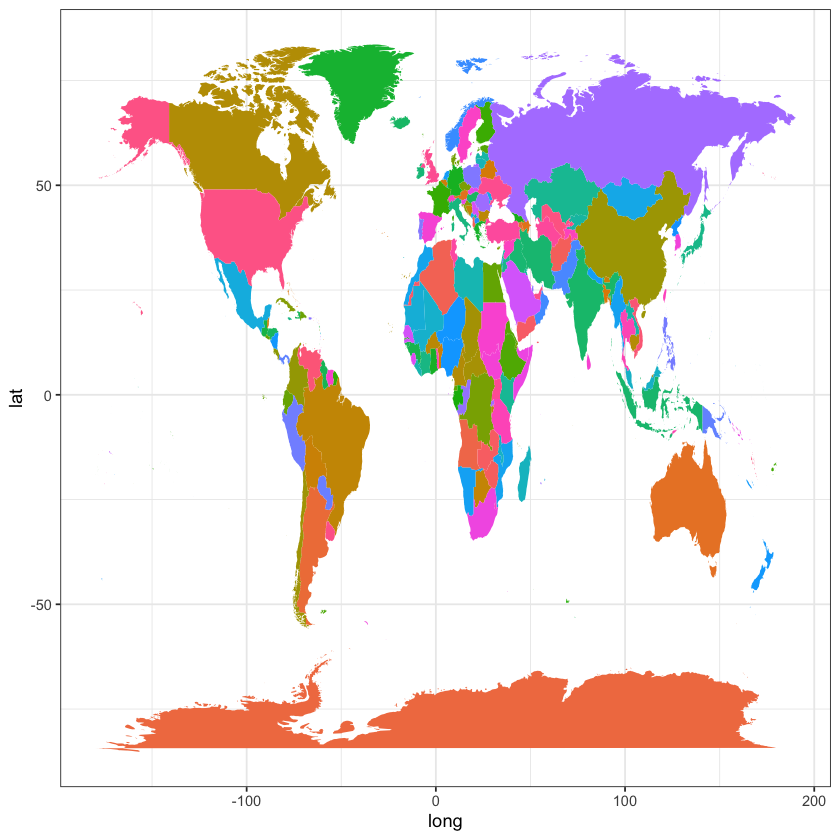

In [5]:
ggplot() + geom_map(data = world_data, map = world_data, aes(long, lat, map_id = region, fill = region)) +
theme(legend.position = "none")

If you wanted to highlight a specific country within the map you can do so with the fill variable and designating which country you want to be what color using `scale_fill_manual()`.

Warning message in geom_map(data = world_data, map = world_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


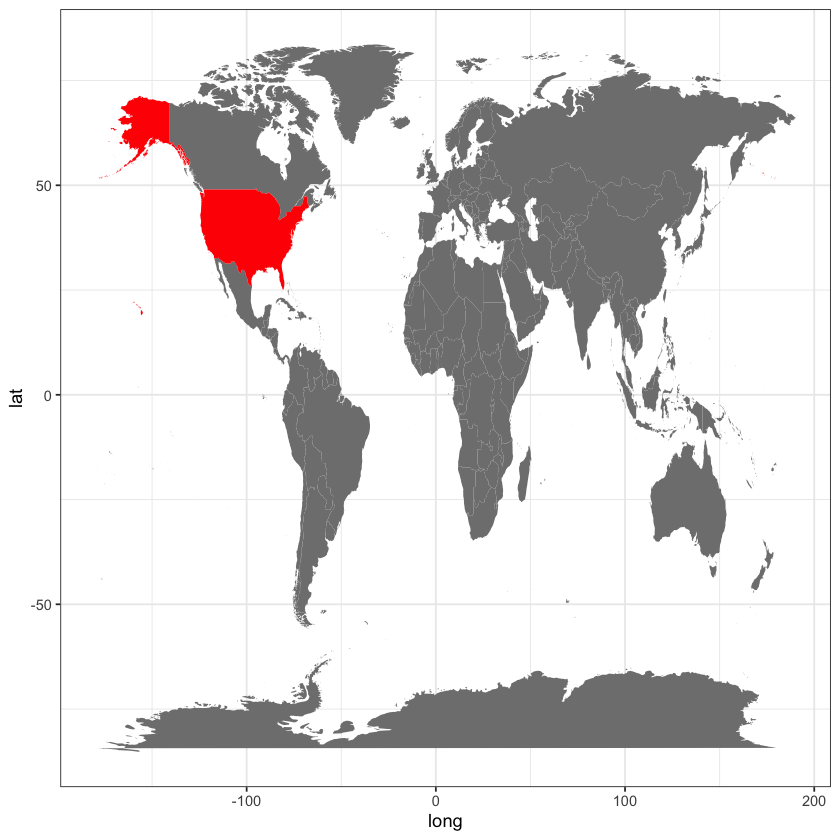

In [6]:
ggplot() + geom_map(data = world_data, map = world_data, aes(long, lat, map_id = region, fill = region)) +
theme(legend.position = "none") + scale_fill_manual(values = c('USA' = "red"))

If you want to change the map projection from the default, you can do so by using `coord_map()` at the end of your plot command shown below.

Warning message in geom_map(data = world_data, map = world_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


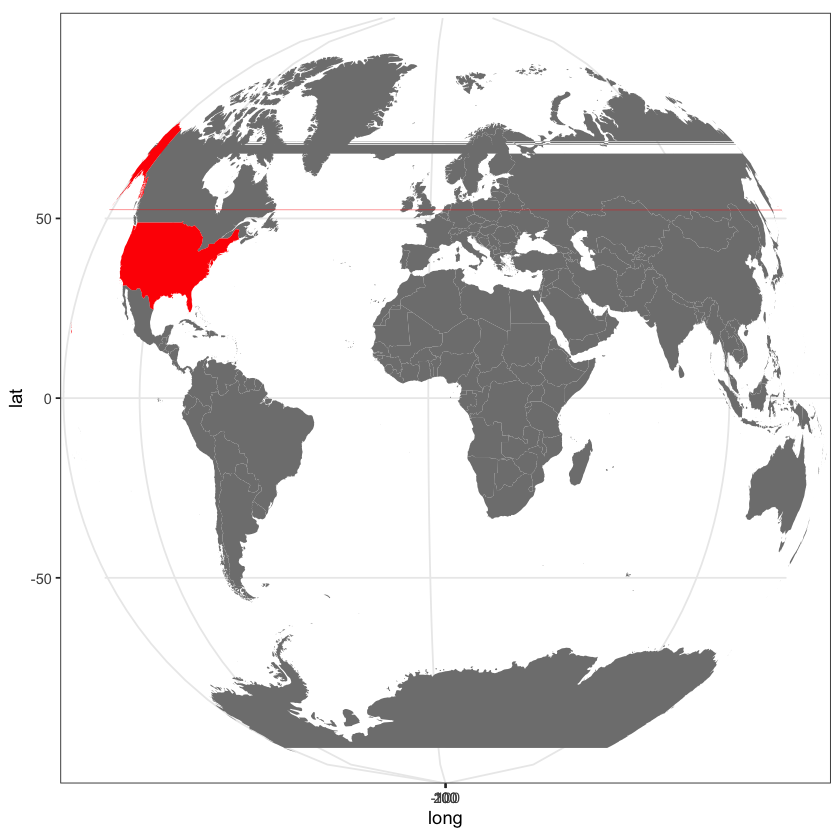

In [7]:
ggplot() + geom_map(data = world_data, map = world_data, aes(long, lat, map_id = region, fill = region)) +
theme(legend.position = "none") + scale_fill_manual(values = c('USA' = "red")) + 
coord_map(projection = "gilbert")

<a name = "2"></a>
### Basic US maps
Next, were going to go through a couple more examples through `map_data()`, but this time of the United States. First we will use `map_data("usa")` to pull a map of the United States with no state boundaries. Second, we use `map_data("state")` to pull a map of the United States that does include state boundaries.

In [8]:
usa_data <- map_data("usa")

Warning message in geom_map(data = usa_data, map = usa_data, aes(long, lat, map_id = region)):
“Ignoring unknown aesthetics: x and y”


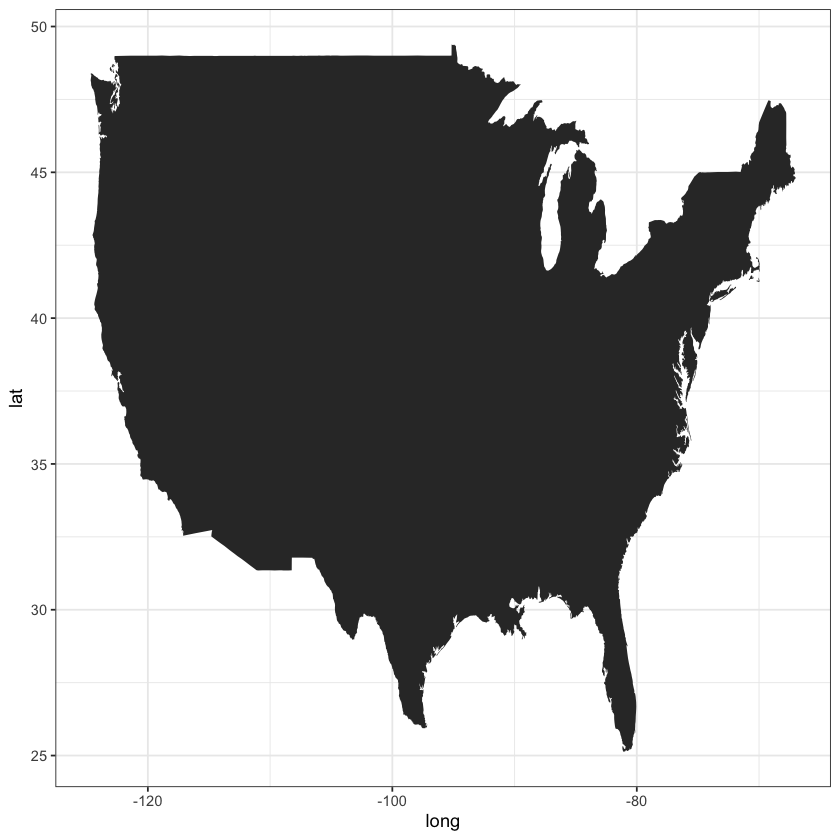

In [9]:
ggplot() + geom_map(data = usa_data, map = usa_data, aes(long, lat, map_id = region))

In [10]:
state_data <- map_data("state")

Warning message in geom_map(data = state_data, map = state_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


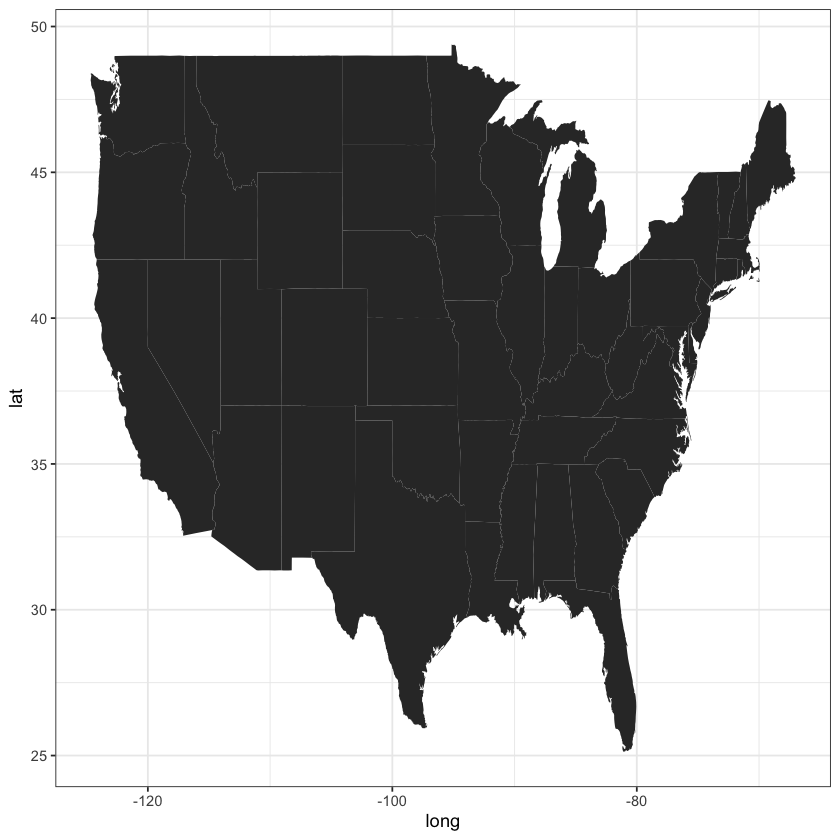

In [11]:
ggplot() + geom_map(data = state_data, map = state_data, aes(long, lat, map_id = region))

Now we are going to use `xlim()` and `ylim()` to zoom in to an area of the US map along the coastline of Texas. What you should see here is that the coastline in these maps does not provide good resolution for the islands or shoreline. If those boundaries are important for your maps or if you need finer resolution boundaries for counties or towns within a state/region then we need to use a higher resolution map.

Warning message in geom_map(data = state_data, map = state_data, aes(long, lat, :
“Ignoring unknown aesthetics: x and y”


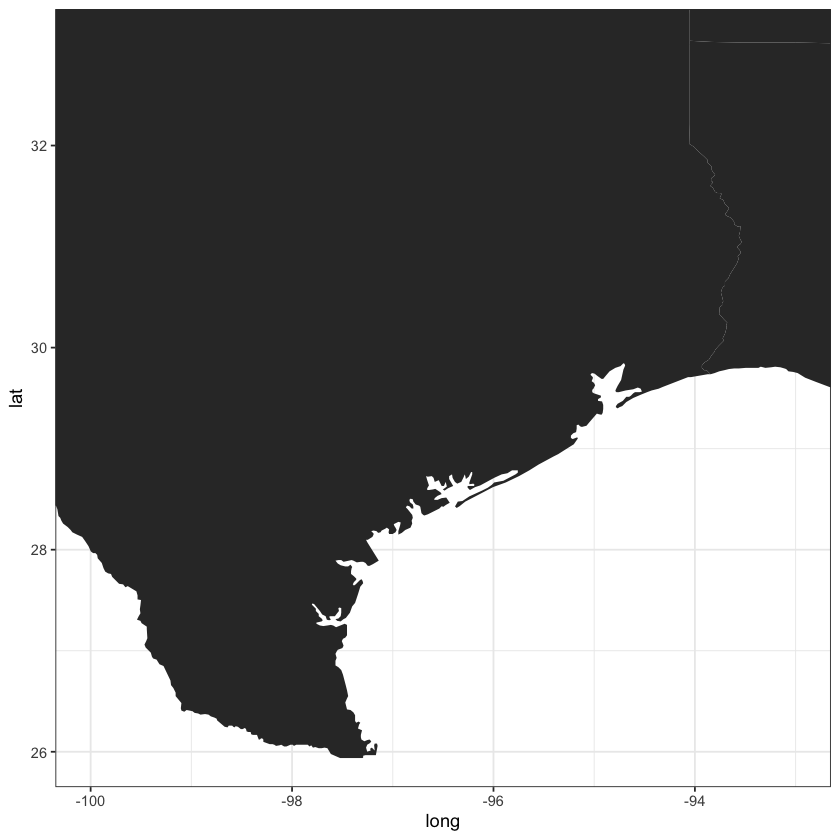

In [12]:
ggplot() + geom_map(data = state_data, map = state_data, aes(long, lat, map_id = region)) +
xlim(-100,-93) + ylim(26,33)

<a name = "3"></a>
### High resolution mapping with GADM
One method for getting high resolution maps is to download the shape files for countries from GADM. GADM is a database that provides high resolution shape files for every country and their subdivisions (in the case of the United States those subdivisions are states, counties, etc.). To download these files from the database to R we can either use `getData()` from the raster package or we can use the `gadm()` function from the geodata package. An exmaple of each is provided below.

In [13]:
USA <- getData('GADM', country = 'USA', level = 1)

Warning message in getData("GADM", country = "USA", level = 1):
“getData will be removed in a future version of raster
. Please use the geodata package instead”


In [14]:
USA <- gadm('GADM', country = 'USA', level = 1)

Next we have to convert those data to a shapefile that is readable by ggplot using `st_as_sf()`. 

In [15]:
USA_sf <- st_as_sf(USA)

Now that we have the USA data formatted correctly, let's filter to only the state of Texas to narrow our plotting. Because GADM data is so high resolution trying to plot the entire United States would take a long time and it works best to narrow in your area to somewhere more specific.

In [16]:
TX_sf <- (USA_sf[USA_sf$NAME_1=="Texas",])

Once we have the data filtered to what we want to plot, we can plot the map of Texas using ggplot() and this time `geom_sf()` instead of `geom_map()`.

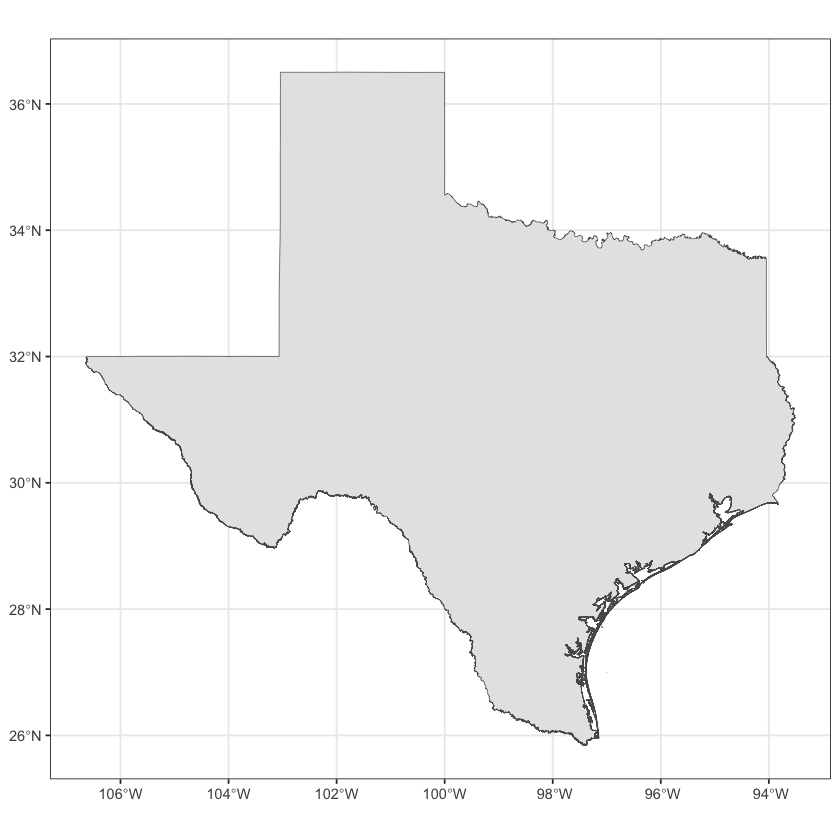

In [17]:
ggplot(TX_sf) + geom_sf()

Now if you wanted to check the resolution along the coastline of this map, we can again zoom in using `xlim()` and `ylim()`.

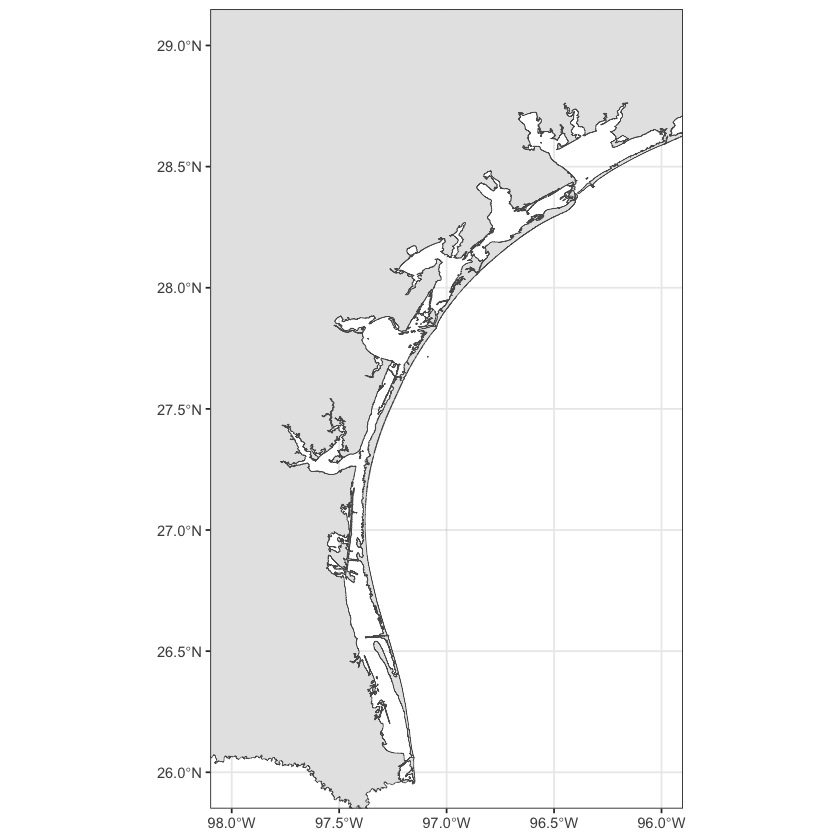

In [18]:
ggplot(TX_sf) + geom_sf() + xlim(-98, -96) + ylim(26,29)

In the case that you want to plot the state of Texas with the other states surrounding it, we could do so by plotting the United States shape file and use `xlim()` and `ylim()` to zoom into the state of Texas.

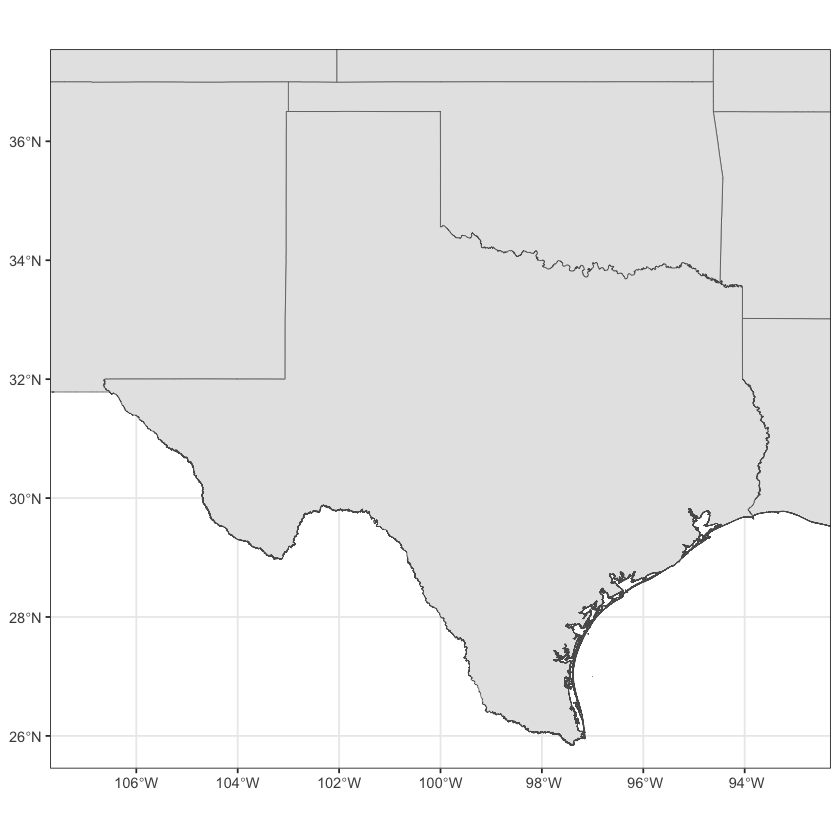

In [19]:
ggplot(USA_sf) + geom_sf() + xlim(-107,-93) + ylim(26,37)

Because these data are only for the United States, we cannot see Mexico in this map. If we wanted to add Mexico we could do so by downloading the shape file for Mexico from GADM, converting it to sf format and then plotting the same plot as before but with an additional `geom_sf()` for the Mexico data. In this case because we only care about the outline of Mexico and not its individual states, we use level zero.

In [20]:
MEX <- gadm('GADM', country = 'MEX', level = 0)

In [21]:
MEX_sf <- st_as_sf(MEX)

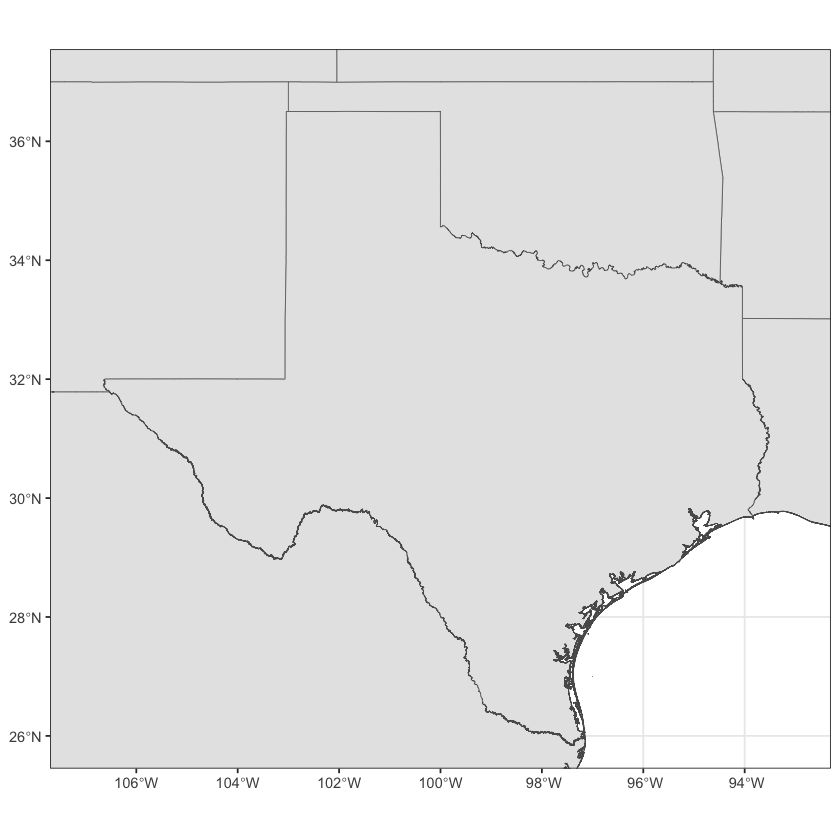

In [22]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + xlim(-107,-93) + ylim(26,37)

If we wanted to highlight the state of Texas in a different color we can now customize this map the same way we do any other ggplot using our aesthetics settings.

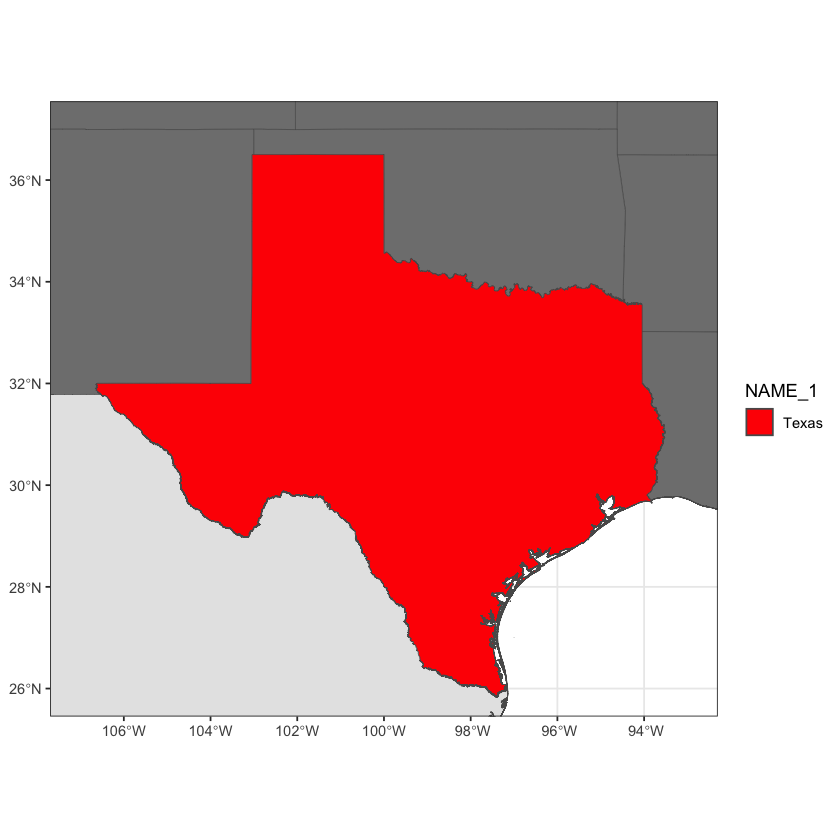

In [23]:
ggplot() + geom_sf(data = USA_sf, aes(fill = NAME_1)) + geom_sf(data = MEX_sf) + xlim(-107,-93) + ylim(26,37) +
scale_fill_manual(values = c('Texas' = "red"))

In the case that you want additional borders, we do that by changing the level of data that we download from GADM. Below is an example of downloading level 2 data which will download county borders for the United States.

In [24]:
USA_counties <- gadm('GADM', country = "USA", level = 2)

In [25]:
USA_counties_sf <- st_as_sf(USA_counties)

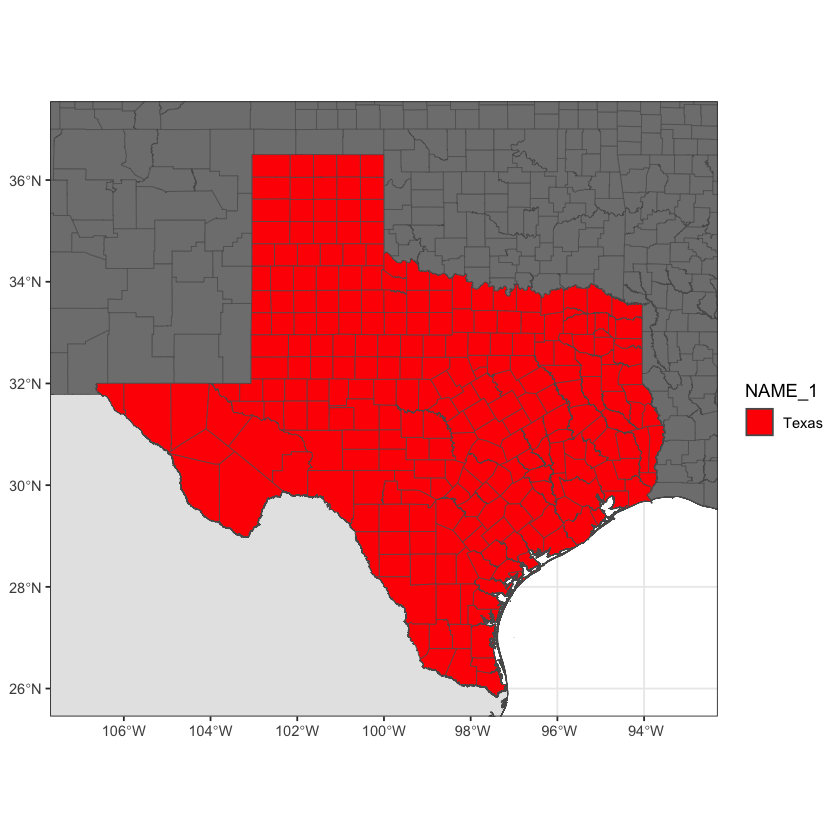

In [26]:
ggplot() + geom_sf(data = USA_counties_sf, aes(fill = NAME_1)) + geom_sf(data = MEX_sf) + xlim(-107,-93) + ylim(26,37) +
scale_fill_manual(values = c('Texas' = "red"))

<a name = "4"></a>
### Plotting rivers and terrain
In the case that you want to plot phyical features like rivers or topography, you may be able to find shape files publicly available for them that you can then import into R. Here I include a link to where some of these data are publicly available for the state of Texas and provide examples of how to import these into R and plot them on the map.

https://www.twdb.texas.gov/mapping/gisdata.asp

In [27]:
TX_rivers <- st_read("~/Desktop/Major_Rivers_dd83/MajorRivers_dd83.shp")

Reading layer `MajorRivers_dd83' from data source 
  `/Users/erinborbee/Desktop/Major_Rivers_dd83/MajorRivers_dd83.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3171 features and 10 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: -106.6298 ymin: 25.83768 xmax: -93.5082 ymax: 35.98436
Geodetic CRS:  NAD83


In [28]:
TX_rivers_sf <- st_as_sf(TX_rivers)

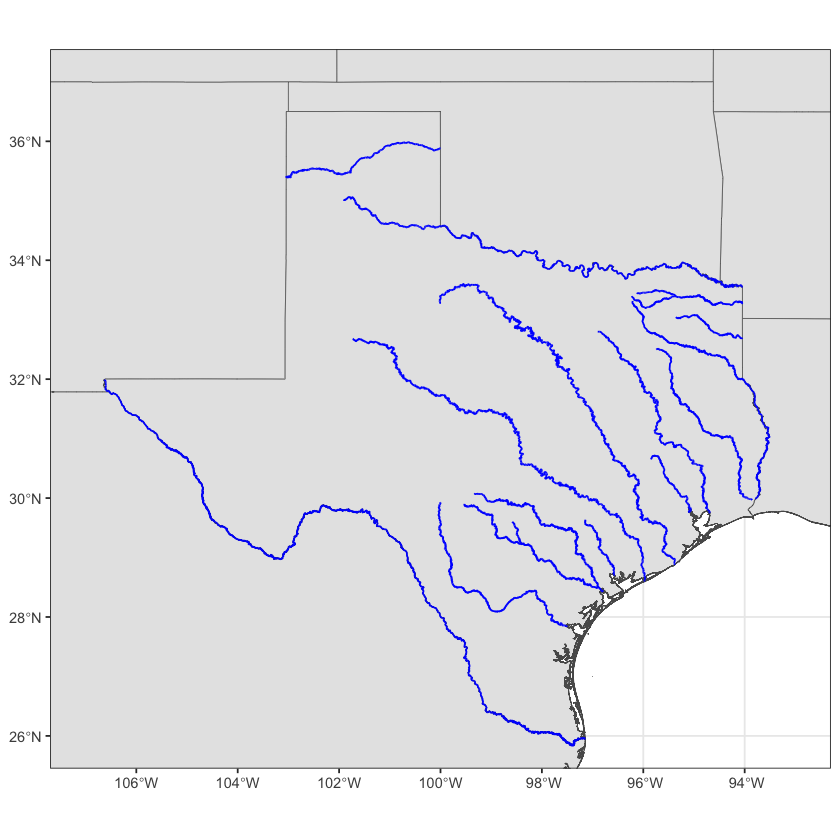

In [29]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_sf(data = TX_rivers, color = "blue") + xlim(-107,-93) + ylim(26,37)

When we zoom into the plot you can notive the the lines provided for the rivers are decently high resolution.

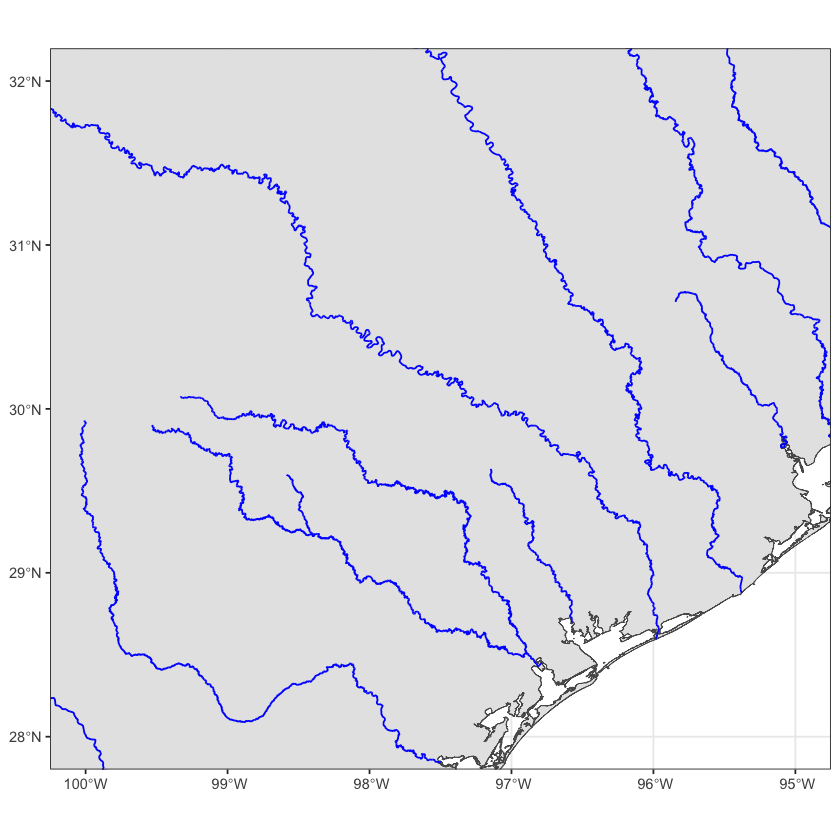

In [30]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_sf(data = TX_rivers, color = "blue") + xlim(-100,-95) + ylim(28,32)

We can also plot terrain using the raster and tidyterra packages if that is something of interest. First we import the `.tif` file into R using the `rast()` function, then if necessary, we rotate the file using rectify.

In [31]:
terrain <- rast("~/Desktop/hillshade/tx_terrain_hillshade_tsms.tif")
terrain <- rectify(terrain)

Warning message:
“[rast] the data in this file are rotated. Use 'rectify' to fix that”


Next we plot the raster object using the `geom_spatraster()` function from tidy terra.

<SpatRaster> resampled to 500472 cells for plotting


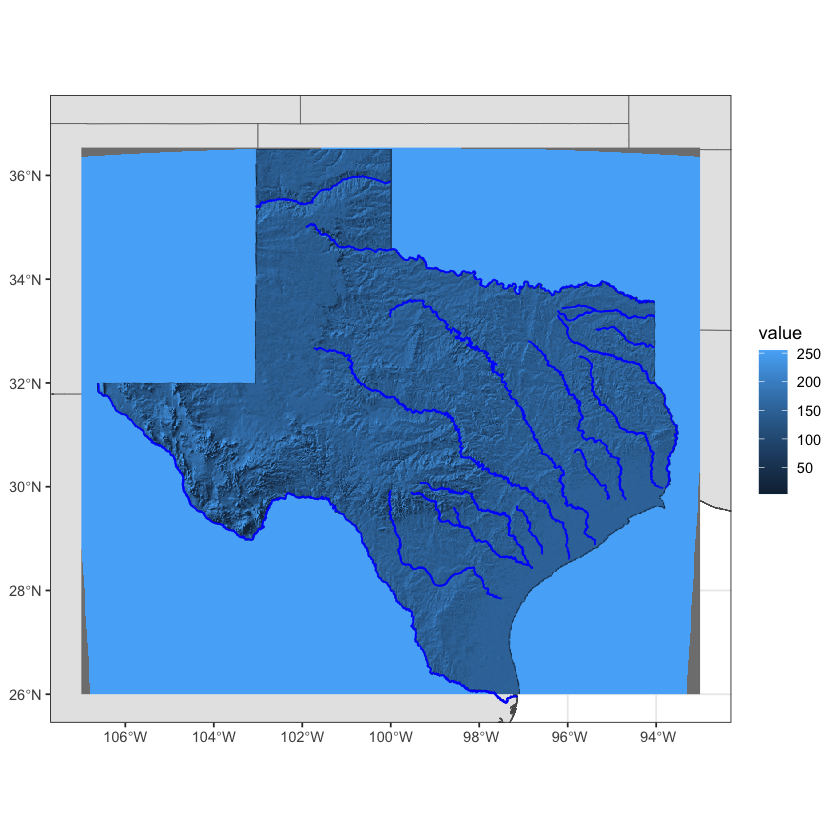

In [32]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_spatraster(data = terrain) +
geom_sf(data = TX_rivers, color = "blue") + xlim(-107,-93) + ylim(26,37)

What you can see now is terrain plotted on top of our map with the river data plotted on top of the terrain. However, the terrain data includes a rectangle surrounding the state that covers our other states and countries in the map. To remove that we filter the raster object to remove anything with the value 255 which is represented by that light blue. 

In [33]:
terrain[terrain[] > 254] = NA

<SpatRaster> resampled to 500472 cells for plotting


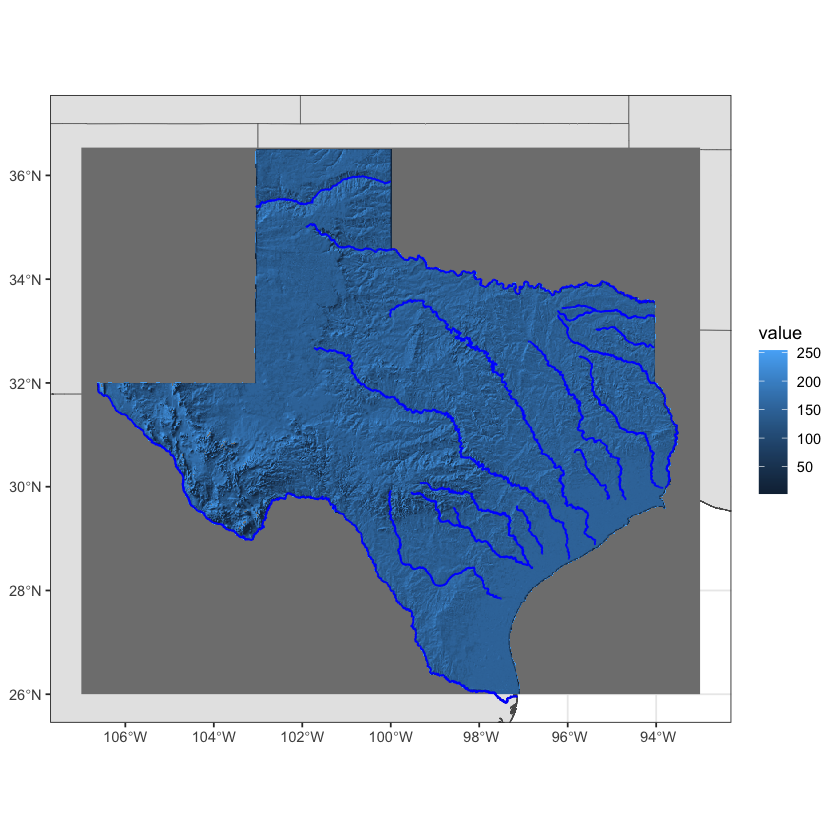

In [34]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_spatraster(data = terrain) +
geom_sf(data = TX_rivers, color = "blue") + xlim(-107,-93) + ylim(26,37)

Once we have filtered the raster object, and plotted the same map again you can see that we eliminated the light blue but still have a dark grey background. We can remove this background using the `na.value = NA` inside either `scale_fill_gradient()` or `scale_fill_viridis()`. Below is an example of using it within the `scale_fill_viridis()` function to remove the background leaving a terrain map of Texas surrounded by the states and countries from our sf objects. 

<SpatRaster> resampled to 500472 cells for plotting


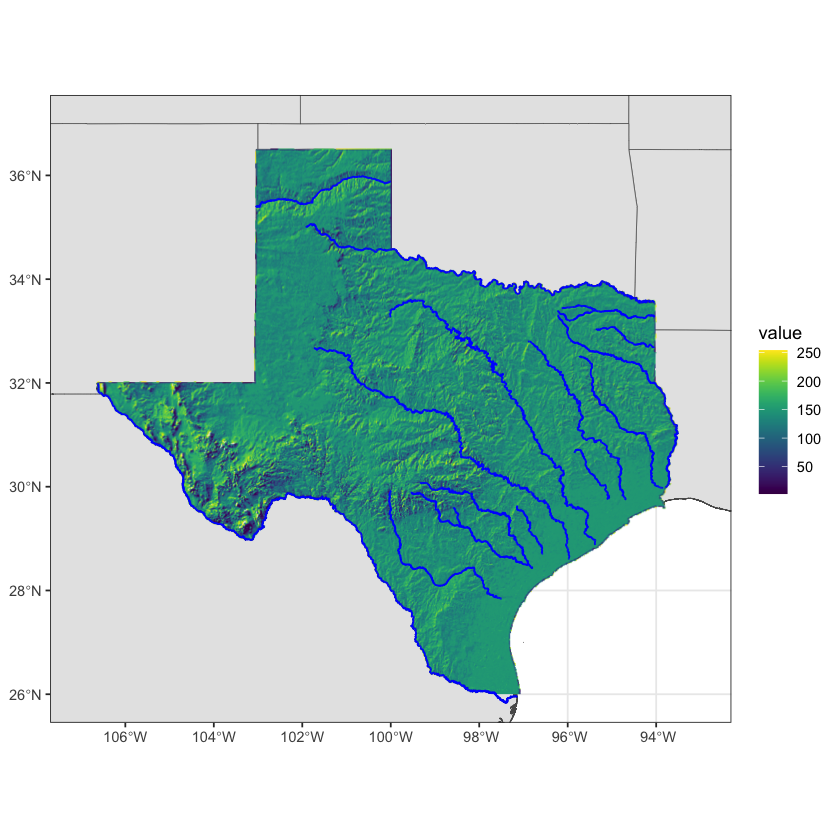

In [35]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_spatraster(data = terrain, interpolate = TRUE) +
geom_sf(data = TX_rivers, color = "blue") + xlim(-107,-93) + ylim(26,37) + 
scale_fill_viridis(na.value = NA)

Once again if we wanted to zoom in to a specific region of the map we could do that by  adjusting `xlim()` and `ylim()`.

<SpatRaster> resampled to 500472 cells for plotting


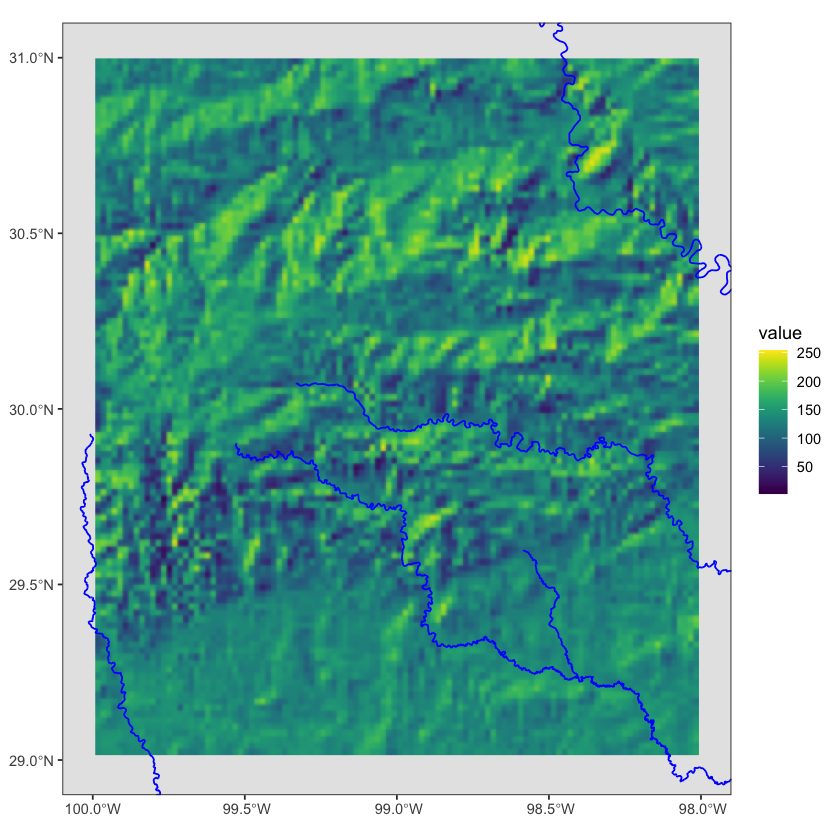

In [36]:
ggplot() + geom_sf(data = USA_sf) + geom_sf(data = MEX_sf) + 
geom_spatraster(data = terrain, interpolate = TRUE) + 
geom_sf(data = TX_rivers, color = "blue") + 
scale_fill_viridis(na.value = NA) + xlim(-100,-98) + ylim(29,31)